In [ ]:
#data similarities - 1
import numpy as np

# Function to calculate Euclidean Distance between two vectors
def euclidean_distance(vector1, vector2):
    return np.linalg.norm(vector1 - vector2)

# Function to calculate Cosine Similarity between two vectors
def cosine_similarity(vector1, vector2):
    dot_product = np.dot(vector1, vector2)
    norm_product = np.linalg.norm(vector1) * np.linalg.norm(vector2)
    return dot_product / norm_product

# Function to calculate Jaccard Similarity between two sets
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union

# Example usage
vector1 = np.array([1, 2, 3])
vector2 = np.array([4, 5, 6])
set1 = set([1, 2, 3, 4])
set2 = set([3, 4, 5, 6])

print("Euclidean Distance:", euclidean_distance(vector1, vector2))
print("Cosine Similarity:", cosine_similarity(vector1, vector2))
print("Jaccard Similarity:", jaccard_similarity(set1, set2))


# Euclidean Distance: This measures the straight-line distance between two points in space. In the context of vectors, it's the length of the line segment connecting the two points. The longer the distance, the less similar the vectors are.
# Cosine Similarity: This measures the cosine of the angle between two vectors. It's a measure of similarity between two non-zero vectors of an inner product space. Cosine similarity ranges from -1 to 1, where 1 means the vectors are identical in direction, 0 means they are orthogonal, and -1 means they are diametrically opposite.
# Jaccard Similarity: This is used for comparing the similarity and diversity of sample sets. It's defined as the size of the intersection divided by the size of the union of two sets. It ranges from 0 to 1, where 1 means the sets are identical, and 0 means they have no common elements.

Euclidean Distance: 5.196152422706632
Cosine Similarity: 0.9746318461970762
Jaccard Similarity: 0.3333333333333333


In [ ]:
#dimensionality reduction - 2
import numpy as np

# Generate a sample user-item matrix
user_item_matrix = np.array([
    [5, 0, 3, 0, 2],
    [4, 0, 0, 0, 1],
    [0, 0, 0, 0, 0],
    [4, 0, 0, 0, 1],
    [0, 0, 0, 0, 0]
])

# Perform Singular Value Decomposition (SVD)
U, Sigma, VT = np.linalg.svd(user_item_matrix)

# Choose the number of dimensions to reduce to
k = 2

# Reduce dimensions
U_k = U[:, :k]
Sigma_k = np.diag(Sigma[:k])
VT_k = VT[:k, :]

# Reconstruct the user-item matrix with reduced dimensions
user_item_matrix_reduced = np.dot(np.dot(U_k, Sigma_k), VT_k)

print("Original User-Item Matrix:")
print(user_item_matrix)
print("\nReduced User-Item Matrix:")
print(user_item_matrix_reduced)

# User-Item Matrix: This is a matrix where each row represents a user and each column represents an item. The values in the matrix represent the ratings that users have given to items. However, in real-world scenarios, this matrix is often sparse because users might not rate all items.
# User Profile Learning: User profile learning involves understanding the preferences of users based on their past interactions with items. One simple approach is to calculate the average rating that each user has given to all items. This average rating serves as the user's profile, indicating their general preferences.
# Implementation: In this example, we calculate user profiles by taking the mean of each row in the user-item matrix. This means we average the ratings given by each user across all items. The resulting vector represents the user profile for each user.
# Usage: Once user profiles are learned, they can be used in various recommendation algorithms to personalize recommendations for users. For example, in collaborative filtering, user profiles can be used to find similar users or to predict the ratings of unseen items for a particular user.

Original User-Item Matrix:
[[5 0 3 0 2]
 [4 0 0 0 1]
 [0 0 0 0 0]
 [4 0 0 0 1]
 [0 0 0 0 0]]

Reduced User-Item Matrix:
[[ 5.00000000e+00  3.33572947e-16  3.00000000e+00  0.00000000e+00
   2.00000000e+00]
 [ 4.00000000e+00 -2.51520935e-16 -4.45061360e-16  0.00000000e+00
   1.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 4.00000000e+00 -2.51520935e-16 -4.45061360e-16  0.00000000e+00
   1.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]]


In [ ]:
#user profiling - 3
import numpy as np

# Sample user-item matrix (rows represent users, columns represent items)
user_item_matrix = np.array([
    [0, 0, 0, 0, 2],
    [0, 0, 3, 0, 1],
    [0, 0, 0, 0, 2],
    [4, 0, 4, 0, 1],
    [0, 0, 0, 0, 0]
])

# Function to calculate user profiles
def calculate_user_profiles(matrix):
    user_profiles = np.mean(matrix, axis=1)
    return user_profiles

# Function to make recommendations based on user profiles
def make_recommendations(user_profiles, item_names):
    recommendations = {}
    for user_id, profile in enumerate(user_profiles):
        # Assuming recommendations are simply the highest rated items
        recommended_item = np.argmax(profile)
        recommendations[user_id] = item_names[recommended_item]
    return recommendations

# Function to print recommendations
def print_recommendations(recommendations):
    print("Recommendations:")
    for user_id, item in recommendations.items():
        print(f"User {user_id}: {item}")

# Sample item names
item_names = ["Item 1", "Item 2", "Item 3", "Item 4", "Item 5"]

# Main function
def main():
    user_profiles = calculate_user_profiles(user_item_matrix)
    recommendations = make_recommendations(user_profiles, item_names)
    print_recommendations(recommendations)

# Execute the main function
if __name__ == "__main__":
    main()


# User-Item Matrix: We define a sample user-item matrix representing users' ratings for different items. This matrix serves as our input data.
# calculate_user_profiles() Function: This function calculates user profiles by taking the mean of each row in the user-item matrix. It returns a vector representing the user profile for each user.
# make_recommendations() Function: This function generates recommendations based on user profiles. In this simple example, recommendations are made by selecting the item with the highest average rating in each user's profile.
# print_recommendations() Function: This function prints the recommendations generated by the make_recommendations() function.
# Main Function: The main function of the program. It calls the calculate_user_profiles() and make_recommendations() functions, and then prints the recommendations.
# Execution: The if __name__ == "__main__": block ensures that the main() function is executed when the script is run as the main program.

Recommendations:
User 0: Item 1
User 1: Item 1
User 2: Item 1
User 3: Item 1
User 4: Item 1


In [ ]:
#content recommendation - 4
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Sample item features (rows represent items, columns represent features)
item_features = np.array([
    [1, 0, 1, 0],  # Item 1: Action, No Romance, High Ratings, No Awards
    [0, 1, 1, 0],  # Item 2: No Action, Romance, High Ratings, No Awards
    [1, 1, 0, 0],  # Item 3: Action, Romance, No High Ratings, No Awards
    [1, 0, 1, 1]   # Item 4: Action, No Romance, High Ratings, Awards
])

# Sample user preferences (row represents user)
user_preferences = np.array([
    [1, 0, 1, 0],  # User: Likes Action, No Romance, Likes High Ratings, No Awards
])

# Function to recommend items based on user preferences
def recommend_items(user_preferences, item_features, item_names):
    # Calculate cosine similarity between user preferences and item features
    similarity_scores = cosine_similarity(user_preferences, item_features)
    # Get indices of items sorted by similarity score in descending order
    sorted_indices = np.argsort(similarity_scores[0])[::-1]
    # Recommend top items
    recommended_items = [item_names[idx] for idx in sorted_indices]
    return recommended_items

# Sample item names
item_names = ["Item 1", "Item 2", "Item 3", "Item 4"]

# Main function
def main():
    recommendations = recommend_items(user_preferences, item_features, item_names)
    print("Recommended Items:")
    for item in recommendations:
        print(item)

# Execute the main function
if __name__ == "__main__":
    main()


# Item Features Matrix: In a content-based recommendation system, each item is described by its features. These features can be categorical or numerical. In this example, we have a matrix where each row represents an item and each column represents a feature.
# User Preferences Vector: Similarly, we represent user preferences as a vector of features indicating what the user likes or dislikes.
# Cosine Similarity: We use cosine similarity to measure the similarity between the user preferences and each item's features. Cosine similarity calculates the cosine of the angle between two vectors and ranges from -1 (completely dissimilar) to 1 (completely similar).
# Recommendation Function: The recommend_items() function calculates the cosine similarity between the user preferences and item features, sorts the items based on similarity scores, and returns the recommended items.
# Main Function: The main function calls the recommend_items() function and prints the recommended items.

Recommended Items:
Item 1
Item 4
Item 3
Item 2


In [ ]:
#collaborative filterting technique - 5
import numpy as np

# Sample user-item matrix (rows represent users, columns represent items)
user_item_matrix = np.array([
    [5, 0, 3, 0, 2],
    [4, 0, 0, 0, 1],
    [0, 0, 0, 0, 0],
    [4, 0, 0, 0, 1],
    [0, 0, 0, 0, 0]
])

# Function to calculate item-item similarity matrix using cosine similarity
def calculate_item_similarity(user_item_matrix):
    item_similarity = np.zeros((user_item_matrix.shape[1], user_item_matrix.shape[1]))
    for i in range(user_item_matrix.shape[1]):
        for j in range(user_item_matrix.shape[1]):
            if i != j:
                item_similarity[i, j] = np.dot(user_item_matrix[:, i], user_item_matrix[:, j]) / \
                                        (np.linalg.norm(user_item_matrix[:, i]) * np.linalg.norm(user_item_matrix[:, j]))
    return item_similarity

# Function to make recommendations based on item-item similarity
def make_item_based_recommendations(user_item_matrix, item_similarity, user_id, top_n=3):
    user_ratings = user_item_matrix[user_id]
    # Find indices of items user hasn't rated
    unrated_indices = np.where(user_ratings == 0)[0]
    # Calculate predicted ratings for unrated items based on weighted sum of similar items
    predicted_ratings = np.dot(item_similarity, user_ratings) / np.sum(item_similarity, axis=1)
    # Sort items based on predicted ratings
    sorted_indices = np.argsort(predicted_ratings)[::-1]
    # Filter out rated items and get top n recommendations
    recommendations = [idx for idx in sorted_indices if idx in unrated_indices][:top_n]
    return recommendations

# Main function
def main():
    # Calculate item-item similarity matrix
    item_similarity = calculate_item_similarity(user_item_matrix)
    # Make recommendations for user 0
    user_id = 0
    recommendations = make_item_based_recommendations(user_item_matrix, item_similarity, user_id)
    print("Recommendations for User", user_id, ":")
    print(recommendations)

# Execute the main function
if __name__ == "__main__":
    main()


# User-Item Matrix: This matrix represents the ratings given by users to items. Each row corresponds to a user, and each column corresponds to an item. The values in the matrix represent the ratings given by users to items (0 indicates no rating).
# Item-Item Similarity Matrix: We calculate the similarity between items using cosine similarity. This matrix represents how similar each pair of items is based on user ratings.
# Item-Based Recommendations: To make recommendations for a user, we first find the items the user hasn't rated yet. Then, for each unrated item, we calculate a predicted rating based on the ratings of similar items. The predicted ratings are computed as a weighted sum of the ratings of similar items, where the weights are the similarities between items. Finally, we sort the unrated items based on predicted ratings and recommend the top N items.
# Main Function: The main function calculates item-item similarity and makes recommendations for a sample user (user 0 in this case).

Recommendations for User 0 :
[3, 1]


<ipython-input-21-3f19f148c3ea>:19: RuntimeWarning: invalid value encountered in scalar divide
  item_similarity[i, j] = np.dot(user_item_matrix[:, i], user_item_matrix[:, j]) / \


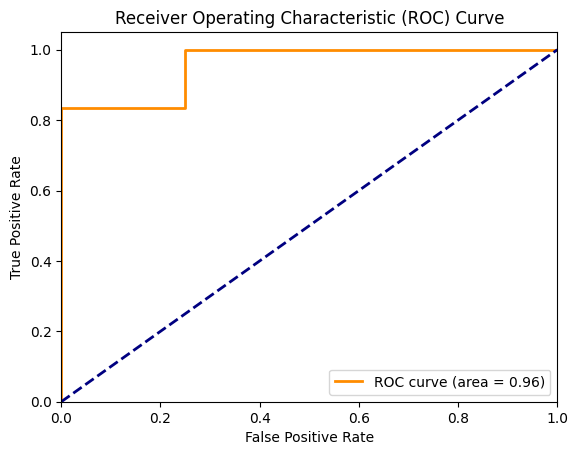

In [ ]:
#roc (receiver operated characterisitc ) curve - 7
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Generate some sample data for demonstration
true_labels = np.array([0, 1, 1, 0, 1, 0, 1, 0, 1, 1])
predicted_scores = np.array([0.1, 0.4, 0.6, 0.3, 0.7, 0.2, 0.8, 0.5, 0.9, 0.65])

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(true_labels, predicted_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# We start by importing the necessary libraries: NumPy for numerical operations, Matplotlib for plotting, and scikit-learn for ROC curve computation and AUC calculation.
# We generate sample data for demonstration purposes: true_labels represent the true binary labels (0 or 1), and predicted_scores represent the predicted scores or probabilities from a binary classifier.
# We use scikit-learn's roc_curve function to compute the ROC curve, which returns the false positive rate (fpr), true positive rate (tpr), and corresponding thresholds.
# We calculate the Area Under the Curve (AUC) using scikit-learn's auc function.
# Finally, we plot the ROC curve using Matplotlib. The ROC curve plots the true positive rate (TPR) against the false positive rate (FPR) for different threshold values. The AUC value represents the area under the ROC curve, which quantifies the performance of the classifier: higher AUC values indicate better performance.

In [ ]:
# Create an attack for tampering with recommender systems